In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import the dataset after copying it to the local VM

In [2]:
! cp -r /content/gdrive/MyDrive/PGSS2022/PGSS2023/Week02/IMDB\ Dataset.csv /content/

In [3]:
import pandas as pd
df = pd.read_csv("/content/IMDB Dataset.csv")

In [4]:
# Distribution of each type of review
df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Learn to classify the text based on the sentiment response

## Cleanse the text data to remove things that wouldn't have any bearing on sentiment

In [6]:
# Convert all words to lowercase
df["review"] = df["review"].str.lower()

# Remove HTML tags using Beautiful soup
from bs4 import BeautifulSoup
df["review"] = df["review"].apply(lambda review: BeautifulSoup(review, "lxml").text)

# Remove urls
# From https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
import re
df["review"] = df["review"].apply(lambda review: re.sub(r'^https?:\/\/.*[\r\n]*', '', review, flags=re.MULTILINE))
df["review"] = df["review"].apply(lambda review: re.sub(r'^http?:\/\/.*[\r\n]*', '', review, flags=re.MULTILINE))

df.head()

<ipython-input-6-550c0fb5bf1e>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df["review"] = df["review"].apply(lambda review: BeautifulSoup(review, "lxml").text)


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [7]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.3 MB/s eta 0:00:00


In [8]:
# Remove Contractions
import contractions
df["review"] = df["review"].apply(lambda review: contractions.fix(review))
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i am going to have to disagree with the previo...,negative


## Create word clouds to get a birds-eye view of the data given

In [9]:
#Create Word Cloud
from wordcloud import WordCloud, STOPWORDS

all_reviews = " "
positive_reviews = " "
negative_reviews =  ""

stopwords = set(STOPWORDS)


positive_df = df[df["sentiment"]  == "positive"]
negative_df = df[df["sentiment"]  == "negative"]

for review in positive_df.review:
    # Tokenize the review
    tokens = review.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    all_reviews += " ".join(tokens)+" "
    positive_reviews  += " ".join(tokens)+" "

for review in negative_df.review:
    # Tokenize the review
    tokens = review.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    all_reviews += " ".join(tokens)+" "
    negative_reviews  += " ".join(tokens)+" "


In [10]:
type(all_reviews)

str

In [11]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_reviews)


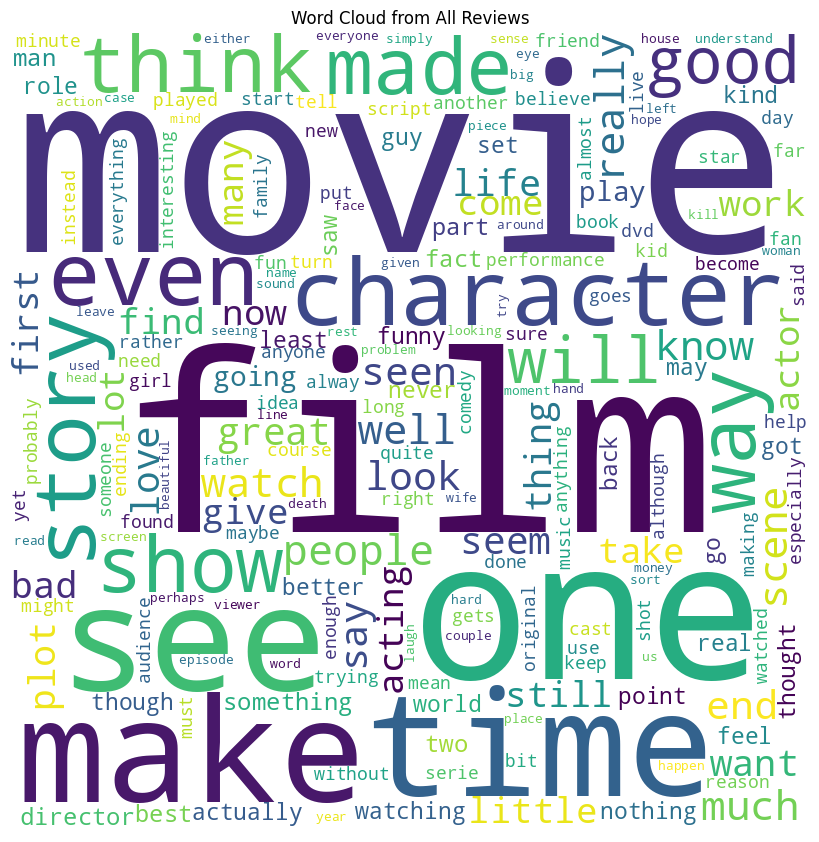

In [12]:
# plot the WordCloud image

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud from All Reviews")
plt.show()


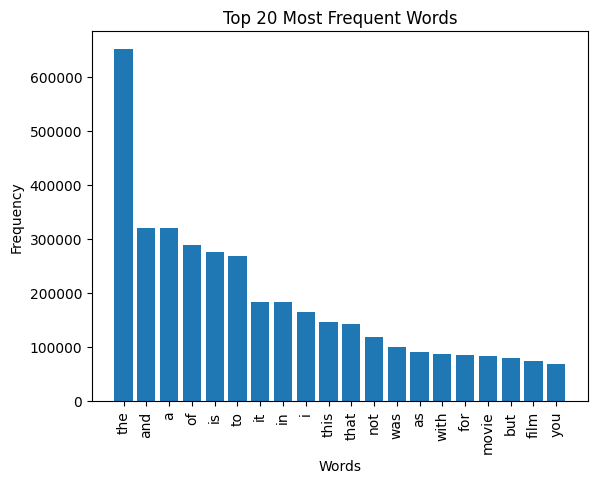

In [13]:
import re
from collections import Counter
import matplotlib.pyplot as plt


def create_barplot(string, k):
    # Step 1: Convert string to list of words
    words = string.split()

    # Step 2: Remove punctuation and special characters
    words = [re.sub(r'[^\w\s]', '', word) for word in words]

    # Step 3: Convert all words to lowercase
    words = [word.lower() for word in words]

    # Step 4: Count frequency of each word using dictionary
    word_counts = Counter(words)

    # Step 5: Sort dictionary by value in descending order and limit to top k
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:k])

    # Step 6: Create barplot using matplotlib
    plt.bar(sorted_word_counts.keys(), sorted_word_counts.values())
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {k} Most Frequent Words')
    plt.show()

k = 20

create_barplot(all_reviews, k)

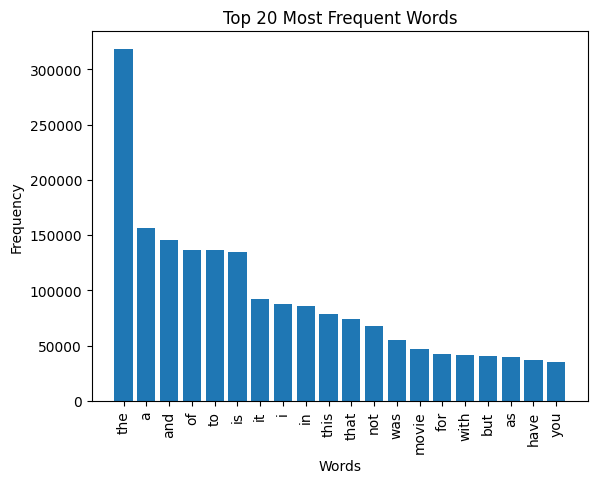

In [14]:
k = 20

create_barplot(negative_reviews, k)

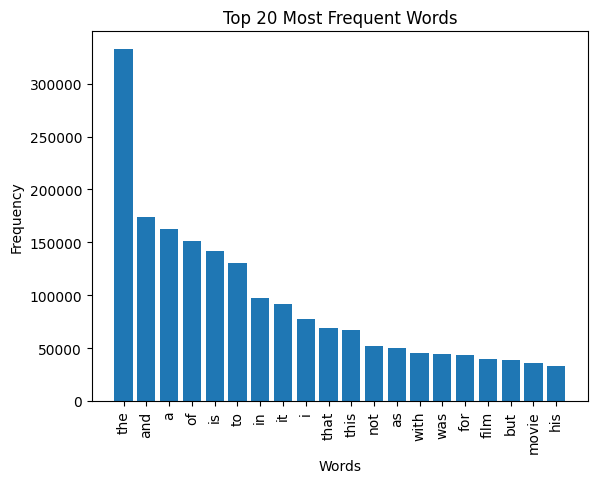

In [15]:
k = 20

create_barplot(positive_reviews, k)

In [16]:
# Define a function to count the number of words in a string
def count_words(text):
    return len(text.split())

# Apply the function to the reviews column using apply method
df['num_words'] = df['review'].apply(count_words)

# Create a new column in the dataframe with the number of words
df.head()

,review,sentiment,num_words
0,one of the other reviewers has mentioned that ...,positive,308
1,a wonderful little production. the filming tec...,positive,156
2,i thought this was a wonderful way to spend ti...,positive,164
3,basically there is a family where a little boy...,negative,135
4,"petter mattei's ""love in the time of money"" is...",positive,222


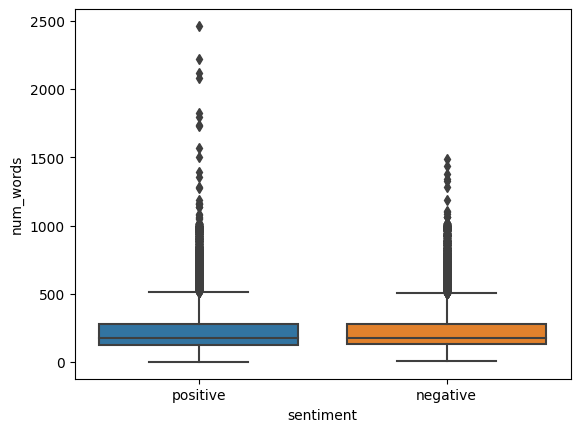

In [17]:
import seaborn as sns

#  Create a grouped boxplot using seaborn's boxplot function
sns.boxplot(data=df, x='sentiment', y='num_words')

# Display the plot
plt.show()

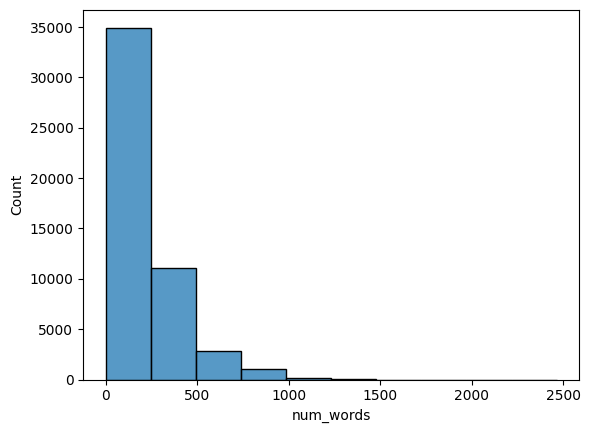

In [18]:
import seaborn as sns

# Create a histogram using seaborn's histplot function
sns.histplot(data=df, x='num_words', bins=10)

# Display the plots
plt.show()

<Axes: xlabel='num_words', ylabel='Density'>

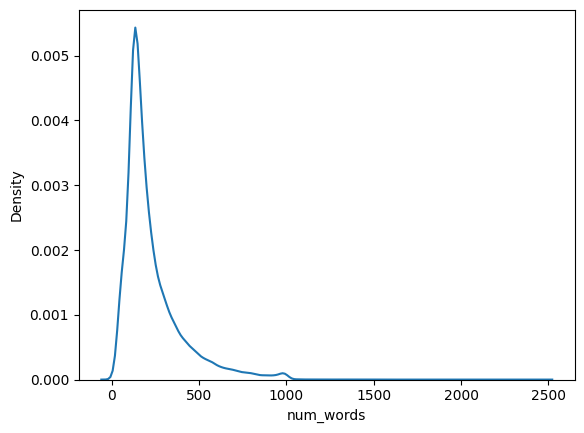

In [19]:

# Create a KDE plot using seaborn's kdeplot function
sns.kdeplot(data=df, x='num_words')


## Create new numerical features in addition to the num_words, using sentence transformers to embed the text into fixed-length numerical representations

In [ ]:
! pip install sentence-transformers

In [66]:
# Create a stratified random sample of df
strata = df['sentiment'].unique()

# Calculate the size of the sample for each stratum
sample_size = 2000
sample_sizes = {s: sample_size for s in strata}

# Use pandas' groupby method to group the dataframe by the sentiment column
groups = df.groupby('sentiment')

# Use pandas' apply method to sample each group based on the size of the sample for that stratum
samples = groups.apply(lambda x: x.sample(n=sample_sizes[x.name])).reset_index(drop=True)

# Concatenate the sampled groups into a single dataframe
sampled_df = pd.concat([samples])

sampled_df

,review,sentiment,num_words
0,"i saw a 12:45 a.m. show last night, and i woul...",negative,211
1,"""do not bother to watch this film"" would be be...",negative,169
2,eric rohmer's 'the lady and the duke' is based...,negative,117
3,when you are used to lana turner in the postma...,negative,204
4,what made the idea of seeing this movie so att...,negative,244
...,...,...,...
3995,"this movie, one of the best i have ever seen, ...",positive,197
3996,excellent show. instead of watching the same o...,positive,209
3997,"...a true geek-girl's dream: high tech, high d...",positive,122
3998,"this movie, even though it is over 70 years ol...",positive,174


In [67]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
# model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('bert-base-nli-mean-tokens', device='cuda')

# Define a function to embed the text using the sentence transformer model
def embed_text(text):
    embeddings = model.encode(text)
    return embeddings.tolist()

# Apply the function to the reviews column using apply method
sampled_df['embeddings'] = sampled_df['review'].apply(embed_text)

sampled_df

,review,sentiment,num_words,embeddings
0,"i saw a 12:45 a.m. show last night, and i woul...",negative,211,"[-0.08346347510814667, 0.92097008228302, 0.252..."
1,"""do not bother to watch this film"" would be be...",negative,169,"[-0.2865268588066101, 1.0197291374206543, 0.14..."
2,eric rohmer's 'the lady and the duke' is based...,negative,117,"[-0.3583935499191284, 0.5944598913192749, 0.01..."
3,when you are used to lana turner in the postma...,negative,204,"[-0.4635770320892334, 0.8706284761428833, 0.11..."
4,what made the idea of seeing this movie so att...,negative,244,"[-0.30849188566207886, 0.5120964646339417, 0.2..."
...,...,...,...,...
3995,"this movie, one of the best i have ever seen, ...",positive,197,"[0.055971525609493256, 1.084001064300537, 0.47..."
3996,excellent show. instead of watching the same o...,positive,209,"[-0.21903592348098755, 0.5459437370300293, 0.5..."
3997,"...a true geek-girl's dream: high tech, high d...",positive,122,"[-0.5591557025909424, 0.5543661117553711, 0.04..."
3998,"this movie, even though it is over 70 years ol...",positive,174,"[-0.2188299000263214, 0.8397987484931946, 0.36..."


In [68]:
# Verify that the GPU is being used
print(model.device)

cuda:0


In [69]:
df_embeddings = pd.DataFrame(list(sampled_df['embeddings']))

sampled_df = pd.concat([sampled_df, df_embeddings], axis=1)
sampled_df.drop(['embeddings'], axis=1, inplace=True)

# sampled_df = sampled_df[['sentiment', 'num_words', 0, 1, ..., 767]]

sampled_df

,review,sentiment,num_words,0,1,2,3,4,5,6,...,758,759,760,761,762,763,764,765,766,767
0,"i saw a 12:45 a.m. show last night, and i woul...",negative,211,-0.083463,0.920970,0.252543,0.008836,-0.054706,-0.664658,1.104398,...,-0.027564,-0.468591,-0.965015,-1.381083,0.419381,-0.804272,0.029010,0.231955,0.661937,0.069276
1,"""do not bother to watch this film"" would be be...",negative,169,-0.286527,1.019729,0.146128,0.134651,-0.357175,-0.361950,2.182026,...,-0.616673,-0.658611,-0.759512,-2.249028,-0.597257,-0.379435,-0.200221,0.472933,-0.016807,0.027296
2,eric rohmer's 'the lady and the duke' is based...,negative,117,-0.358394,0.594460,0.017362,0.488211,-0.020189,-0.218633,0.778041,...,0.006286,-0.082864,-0.979328,-1.298652,0.104593,-0.551748,-0.084605,0.218129,0.423094,0.325483
3,when you are used to lana turner in the postma...,negative,204,-0.463577,0.870628,0.112531,0.092251,-0.653061,-0.086289,1.382301,...,-0.327342,-0.587388,-1.263622,-1.652248,0.268796,-0.637213,-0.022153,0.715606,0.845431,0.227747
4,what made the idea of seeing this movie so att...,negative,244,-0.308492,0.512096,0.217049,0.279652,-0.173095,-0.508826,0.957248,...,-0.281132,-0.893458,-1.005212,-2.111649,-0.079829,-0.226454,-0.262708,0.086770,0.109174,-0.067754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,"this movie, one of the best i have ever seen, ...",positive,197,0.055972,1.084001,0.477718,0.562192,-0.202429,0.139212,1.873116,...,-0.049896,-0.867893,-1.329562,-1.675865,-0.265920,-0.274702,-0.014077,-0.084480,-0.336008,0.278395
3996,excellent show. instead of watching the same o...,positive,209,-0.219036,0.545944,0.594563,0.145159,-0.535174,-1.249176,1.373664,...,-0.034188,-0.994809,-1.085699,-1.756433,0.210306,-0.534685,0.147476,0.509941,0.466147,0.540700
3997,"...a true geek-girl's dream: high tech, high d...",positive,122,-0.559156,0.554366,0.042107,0.070941,0.291406,-1.505635,-0.255374,...,-0.580662,-1.133360,-1.022772,-1.766369,-0.241627,-0.545402,0.334661,-0.074459,1.010033,0.119252
3998,"this movie, even though it is over 70 years ol...",positive,174,-0.218830,0.839799,0.364105,0.073238,-0.036855,-0.496857,1.171650,...,-0.653225,-1.188777,-1.275178,-2.197100,0.014505,-0.467428,0.172815,0.007689,0.569077,0.161305


In [70]:
modelReadDataset = sampled_df.drop(['review'], axis=1)
modelReadDataset['sentiment'] = modelReadDataset['sentiment'].astype('category')
modelReadDataset

,sentiment,num_words,0,1,2,3,4,5,6,7,...,758,759,760,761,762,763,764,765,766,767
0,negative,211,-0.083463,0.920970,0.252543,0.008836,-0.054706,-0.664658,1.104398,0.252176,...,-0.027564,-0.468591,-0.965015,-1.381083,0.419381,-0.804272,0.029010,0.231955,0.661937,0.069276
1,negative,169,-0.286527,1.019729,0.146128,0.134651,-0.357175,-0.361950,2.182026,0.013003,...,-0.616673,-0.658611,-0.759512,-2.249028,-0.597257,-0.379435,-0.200221,0.472933,-0.016807,0.027296
2,negative,117,-0.358394,0.594460,0.017362,0.488211,-0.020189,-0.218633,0.778041,0.122013,...,0.006286,-0.082864,-0.979328,-1.298652,0.104593,-0.551748,-0.084605,0.218129,0.423094,0.325483
3,negative,204,-0.463577,0.870628,0.112531,0.092251,-0.653061,-0.086289,1.382301,0.213369,...,-0.327342,-0.587388,-1.263622,-1.652248,0.268796,-0.637213,-0.022153,0.715606,0.845431,0.227747
4,negative,244,-0.308492,0.512096,0.217049,0.279652,-0.173095,-0.508826,0.957248,-0.365789,...,-0.281132,-0.893458,-1.005212,-2.111649,-0.079829,-0.226454,-0.262708,0.086770,0.109174,-0.067754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,positive,197,0.055972,1.084001,0.477718,0.562192,-0.202429,0.139212,1.873116,-0.094064,...,-0.049896,-0.867893,-1.329562,-1.675865,-0.265920,-0.274702,-0.014077,-0.084480,-0.336008,0.278395
3996,positive,209,-0.219036,0.545944,0.594563,0.145159,-0.535174,-1.249176,1.373664,0.558379,...,-0.034188,-0.994809,-1.085699,-1.756433,0.210306,-0.534685,0.147476,0.509941,0.466147,0.540700
3997,positive,122,-0.559156,0.554366,0.042107,0.070941,0.291406,-1.505635,-0.255374,0.072693,...,-0.580662,-1.133360,-1.022772,-1.766369,-0.241627,-0.545402,0.334661,-0.074459,1.010033,0.119252
3998,positive,174,-0.218830,0.839799,0.364105,0.073238,-0.036855,-0.496857,1.171650,0.106192,...,-0.653225,-1.188777,-1.275178,-2.197100,0.014505,-0.467428,0.172815,0.007689,0.569077,0.161305


In [71]:
# Rename the num_words column to 761
modelReadDataset.rename(columns={'num_words': '761'}, inplace=True)
modelReadDataset.rename(columns={'761': 761}, inplace=True)

modelReadDataset

,sentiment,761,0,1,2,3,4,5,6,7,...,758,759,760,761,762,763,764,765,766,767
0,negative,211,-0.083463,0.920970,0.252543,0.008836,-0.054706,-0.664658,1.104398,0.252176,...,-0.027564,-0.468591,-0.965015,-1.381083,0.419381,-0.804272,0.029010,0.231955,0.661937,0.069276
1,negative,169,-0.286527,1.019729,0.146128,0.134651,-0.357175,-0.361950,2.182026,0.013003,...,-0.616673,-0.658611,-0.759512,-2.249028,-0.597257,-0.379435,-0.200221,0.472933,-0.016807,0.027296
2,negative,117,-0.358394,0.594460,0.017362,0.488211,-0.020189,-0.218633,0.778041,0.122013,...,0.006286,-0.082864,-0.979328,-1.298652,0.104593,-0.551748,-0.084605,0.218129,0.423094,0.325483
3,negative,204,-0.463577,0.870628,0.112531,0.092251,-0.653061,-0.086289,1.382301,0.213369,...,-0.327342,-0.587388,-1.263622,-1.652248,0.268796,-0.637213,-0.022153,0.715606,0.845431,0.227747
4,negative,244,-0.308492,0.512096,0.217049,0.279652,-0.173095,-0.508826,0.957248,-0.365789,...,-0.281132,-0.893458,-1.005212,-2.111649,-0.079829,-0.226454,-0.262708,0.086770,0.109174,-0.067754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,positive,197,0.055972,1.084001,0.477718,0.562192,-0.202429,0.139212,1.873116,-0.094064,...,-0.049896,-0.867893,-1.329562,-1.675865,-0.265920,-0.274702,-0.014077,-0.084480,-0.336008,0.278395
3996,positive,209,-0.219036,0.545944,0.594563,0.145159,-0.535174,-1.249176,1.373664,0.558379,...,-0.034188,-0.994809,-1.085699,-1.756433,0.210306,-0.534685,0.147476,0.509941,0.466147,0.540700
3997,positive,122,-0.559156,0.554366,0.042107,0.070941,0.291406,-1.505635,-0.255374,0.072693,...,-0.580662,-1.133360,-1.022772,-1.766369,-0.241627,-0.545402,0.334661,-0.074459,1.010033,0.119252
3998,positive,174,-0.218830,0.839799,0.364105,0.073238,-0.036855,-0.496857,1.171650,0.106192,...,-0.653225,-1.188777,-1.275178,-2.197100,0.014505,-0.467428,0.172815,0.007689,0.569077,0.161305


In [72]:
modelReadDataset.columns

Index(['sentiment',         761,           0,           1,           2,
                 3,           4,           5,           6,           7,
       ...
               758,         759,         760,         761,         762,
               763,         764,         765,         766,         767],
      dtype='object', length=770)

## Classify the text after converting the response variable into a categorical type

In [73]:
# Create a decision tree to classify sentiment using the remaining columns of modelReadDataset

## Drop the num_words column from modelReadDataset
# modelReadDataset.drop('num_words', axis=1, inplace=True)

# Rename the num_words column to 761
# modelReadDataset.rename(columns={'num_words': '761'}, inplace=True)

from sklearn.model_selection import train_test_split

X = modelReadDataset.drop('sentiment', axis=1)
y = modelReadDataset['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [75]:
from sklearn import metrics

y_pred = dt_classifier.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Precision:', metrics.precision_score(y_test, y_pred))
# print('Recall:', metrics.recall_score(y_test, y_pred))
# print('F1 Score:', metrics.f1_score(y_test, y_pred))


Accuracy: 0.71875


In [76]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['negative', 'positive'])
print(report)


              precision    recall  f1-score   support

    negative       0.74      0.72      0.73       422
    positive       0.70      0.71      0.71       378

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800



## Save the trained model and the model ready dataset that was used to build the model

In [77]:
## Save dt_classifier to a pkl file for loading later
import pickle

with open('/content/gdrive/MyDrive/PGSS2022/PGSS2023/Week02/dt_model.pkl', 'wb') as f:
    pickle.dump(dt_classifier, f)

with open('/content/gdrive/MyDrive/PGSS2022/PGSS2023/Week02/modelReadyDataset_sample1000reviews.pkl', 'wb') as f:
    pickle.dump(modelReadDataset, f)

# Running inference on out-of-sample data

## Load the model

In [78]:
# Load the model from the pkl file
import pickle

with open('/content/gdrive/MyDrive/PGSS2022/PGSS2023/Week02/dt_model.pkl', 'rb') as f:
    dt_classifier = pickle.load(f)

dt_classifier

DecisionTreeClassifier(random_state=42)

## Read the new data

In [79]:
# https://docs.google.com/spreadsheets/d/1VK-Zs72ebK6ddwvDYFN2cA04PDTbVLXJeylmdJ7OxkM/edit#gid=1517061328

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('PGSS2023').get_worksheet(5) #CrowdSourcedSentimentData

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
newDf = pd.DataFrame.from_records(rows[1:])

newDf.columns = rows[0]

newDf

[['Name', 'review', 'sentiment'], ['Parth Parikh', 'On Saturday, friends and I went to the Kennywood amusement park and enjoyed riding various roller coasters. After returning, I had a great time continuing to hang out on campus.', 'Positive'], ['Ben Nguyen', 'We cheated at the Arcade and lost $60', 'Negative'], ['Felix Yang', 'We went to Kennywood, it was fun and great', 'Positive'], ['Sooraj Tharumia', 'We got Github CoPilot to install on the local development environment.', 'Positive'], ['Helen Mao', "I can't escape the country accent.", 'Negative'], ['Kamya Rajesh', 'I slept in, watched a movie, had boba, and walked around with my friends.', 'Positive'], ['Yanwei Liu', 'I walked with friends to a crepe shop, but it was closed. We were so sad.', 'Negative'], ['Olina Mukherjee', 'we made Mega Bed and had a sleepover with 10 people in one AC-ed room, it was fun', 'Positive'], ['Lihini Ranaweera', 'My friends and I went to Kennywood and had fun. We decorated a cake and enjoyed it. ', '

,Name,review,sentiment
0,Parth Parikh,"On Saturday, friends and I went to the Kennywo...",Positive
1,Ben Nguyen,We cheated at the Arcade and lost $60,Negative
2,Felix Yang,"We went to Kennywood, it was fun and great",Positive
3,Sooraj Tharumia,We got Github CoPilot to install on the local ...,Positive
4,Helen Mao,I can't escape the country accent.,Negative
5,Kamya Rajesh,"I slept in, watched a movie, had boba, and wal...",Positive
6,Yanwei Liu,"I walked with friends to a crepe shop, but it ...",Negative
7,Olina Mukherjee,we made Mega Bed and had a sleepover with 10 p...,Positive
8,Lihini Ranaweera,My friends and I went to Kennywood and had fun...,Positive
9,Kofi Anokye,Slept more than 6 hours,Positive


## Engineer the features that the model needs

In [80]:
# Define a function to count the number of words in a string
def count_words(text):
    return len(text.split())

# Apply the function to the reviews column using apply method
newDf['num_words'] = newDf['review'].apply(count_words)

newDf["review"] = newDf["review"].str.lower()

newDf.rename(columns={'num_words': 761}, inplace=True)

import pandas as pd
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
# model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('bert-base-nli-mean-tokens', device='cuda')

# Define a function to embed the text using the sentence transformer model
def embed_text(text):
    embeddings = model.encode(text)
    return embeddings.tolist()

# Apply the function to the reviews column using apply method
newDf['embeddings'] = newDf['review'].apply(embed_text)

df_embeddings = pd.DataFrame(list(newDf['embeddings']))

newDf = pd.concat([newDf, df_embeddings], axis=1)
newDf.drop(['embeddings'], axis=1, inplace=True)

# Make the words in "sentiment" column lower-case
newDf["review"] = newDf["review"].str.lower()
newDf["sentiment"] = newDf["sentiment"].str.lower()

newDf

,Name,review,sentiment,761,0,1,2,3,4,5,...,758,759,760,761,762,763,764,765,766,767
0,Parth Parikh,"on saturday, friends and i went to the kennywo...",positive,30,-0.236651,-0.411669,1.803870,0.502376,0.056640,-1.442143,...,-0.458309,-1.342463,-1.151225,-0.869811,0.571280,-2.087172,-0.119997,0.238306,-0.044361,-0.240646
1,Ben Nguyen,we cheated at the arcade and lost $60,negative,8,0.171415,0.616539,-0.202054,0.811134,0.370447,0.262969,...,-0.315388,0.073051,-0.770700,-0.399417,1.135651,-0.010402,-0.308450,-0.420459,0.444750,0.080028
2,Felix Yang,"we went to kennywood, it was fun and great",positive,9,0.093172,-0.034284,1.983440,0.138529,-0.225989,-1.127789,...,-0.410948,-1.585070,-0.316526,-1.516949,-0.136290,-1.147071,-0.361482,0.407926,0.064288,-0.198978
3,Sooraj Tharumia,we got github copilot to install on the local ...,positive,11,0.401379,0.230450,1.246814,0.516489,0.259700,-0.140194,...,-0.546583,-0.560267,-1.407246,-0.154892,0.023543,-0.709044,-0.427847,-0.272633,-0.581324,0.216744
4,Helen Mao,i can't escape the country accent.,negative,6,0.092309,0.296268,1.460296,0.507051,0.305698,0.545499,...,-0.626227,-0.733478,0.323088,-0.601730,-0.092325,-1.092104,0.505501,0.729472,-0.260707,0.409460
5,Kamya Rajesh,"i slept in, watched a movie, had boba, and wal...",positive,14,0.510924,0.689157,1.570543,-0.377628,-0.166212,-0.482224,...,0.023850,-0.709443,-0.617774,-0.527576,1.099379,-0.469343,0.315280,1.062005,0.983859,-0.243286
6,Yanwei Liu,"i walked with friends to a crepe shop, but it ...",negative,16,-0.165044,0.536896,1.078410,-0.229326,-0.227582,0.793055,...,0.080410,-1.047962,-1.118609,-1.558059,0.734870,-1.059605,-0.329513,0.827436,-0.415041,-0.183259
7,Olina Mukherjee,we made mega bed and had a sleepover with 10 p...,positive,18,-0.143872,0.736027,0.037365,0.281454,0.494500,-1.076953,...,-0.851258,-1.161659,-0.581674,-0.447503,0.525668,-0.141608,0.625408,0.104810,1.221338,-0.424296
8,Lihini Ranaweera,my friends and i went to kennywood and had fun...,positive,17,-0.505824,0.684451,0.988027,-0.128968,-0.839170,-0.631768,...,-0.923227,-2.282973,-0.839400,-1.330241,0.308691,-0.934405,0.053562,0.271991,-0.229564,0.242981
9,Kofi Anokye,slept more than 6 hours,positive,5,0.568165,-0.146791,0.744467,0.358526,0.210618,-0.448313,...,0.404829,0.027615,0.257842,0.187654,1.013081,-0.407390,-0.252731,-0.399876,0.951630,-0.782845


## Evaluate the trained model on the new data

In [81]:
from sklearn import metrics

y_pred = dt_classifier.predict(newDf.drop(['sentiment','Name','review'], axis=1))

print('Accuracy:', metrics.accuracy_score(newDf['sentiment'].values, y_pred))

Accuracy: 0.5294117647058824


In [82]:
from sklearn.metrics import classification_report

report = classification_report(newDf['sentiment'].values, y_pred, target_names=['negative', 'positive'])
print(report)


              precision    recall  f1-score   support

    negative       0.29      0.40      0.33         5
    positive       0.70      0.58      0.64        12

    accuracy                           0.53        17
   macro avg       0.49      0.49      0.48        17
weighted avg       0.58      0.53      0.55        17



In [ ]:
# More data for training seems to improve the model in terms of its in-sample and out-of-sample performance.